In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from scipy import stats
plt.style.use('dark_background')

In [ ]:
# Itaú Unibanco (ITUB4): 10,502%
# Bradesco  (BBDC4): 9,119%
# Vale (VALE3): 8,586%
# Petrobras (PETR4): 7,061%
# Petrobras (PETR3): 5,143%
# Ambev (ABEV3): 5,138%
# Banco do Brasil (BBAS3): 4,468%
# B3 (B3SA3): 4,154%
# Itaú S.A. (ITSA4) 3,855%

In [2]:
tickers = ['ITUB4.SA', 'RENT3.SA', 'B3SA3.SA', 'ABEV3.SA', 'JBSS3.SA', 'SUZB3.SA', 'NTCO3.SA', 'LREN3.SA', 'GGBR4.SA', 'HAPV3.SA', 'RAIL3.SA', 'EGIE3.SA', 'BRKM5.SA', 'MRFG3.SA', 'BRML3.SA']
dados = yf.download(tickers,start='2021-01-01')['Adj Close'][tickers]
log_returns = np.log(dados/dados.shift()).iloc[1:-1]

[*********************100%***********************]  15 of 15 completed


In [4]:
user_weight = None
long_only = False
n_tickers = len(tickers)
meta = 15

In [5]:
#Recomendado não utilizar n > 20.000.000
t0 = datetime.now()
n = 20000000

weights = np.random.rand(n, n_tickers)
if not long_only:
    weights = weights*2 - 1
if user_weight:
    weights[0] = np.array(user_weight)
weights /= weights.sum(axis=1, keepdims=1)

exp_rtns = np.sum(np.array(log_returns.mean()).T*weights, axis=1)*252
exp_vols = np.sqrt((weights * np.dot(weights, np.array(log_returns.cov())*252)).sum(-1))
sharpe_ratios = exp_rtns / exp_vols

print('Tempo Total de Simulação:', datetime.now()-t0)
print(weights)

Tempo Total de Simulação: 0:00:50.114292
[[ 0.55079779  0.67793588 -0.77370082 ... -0.13759218  0.33717547
   0.31889852]
 [ 1.14592999  0.8492656   0.04319967 ... -1.09600768 -0.20552579
   0.07974508]
 [ 0.54256831 -0.12706324  0.02905746 ... -0.23982054  0.72410485
  -0.03217654]
 ...
 [ 0.20886288  0.36014147 -0.22861969 ...  0.01931921 -0.17643375
  -0.17370051]
 [ 0.0015375   0.15471564 -0.12201578 ... -0.00367156  0.12925045
   0.13010601]
 [ 0.24884376 -0.02646686 -0.0110975  ... -0.20700259  0.27169124
   0.07177161]]


In [16]:
# Não utiizar com n > 100.000
t0 = datetime.now()
n = 100000

weights = np.zeros((n, 5))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    if i == 0:
        weight = np.array(user_weight)
    else:
        weight = np.random.random(5)
        
    weight = weight / weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]
print('Tempo Total de Simulação:', datetime.now()-t0)

Tempo Total de Simulação: 0:11:51.936565


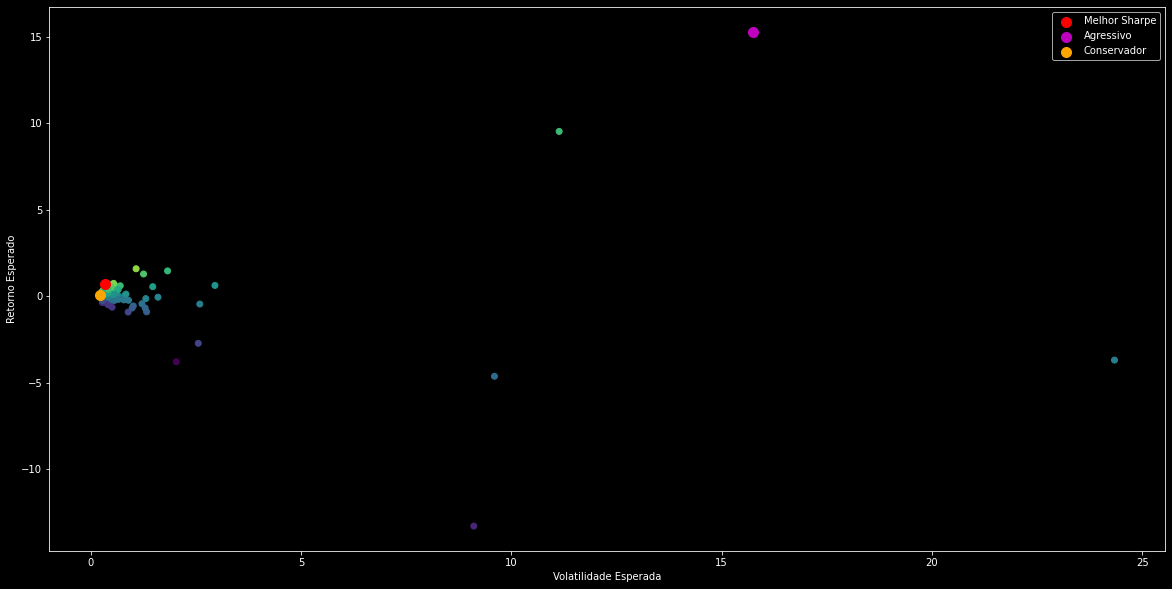

In [6]:
# Usar sample para n > 1.000.000
sample_size = 100
sample = np.random.choice(np.arange(0, n), size=sample_size, replace=False) if sample_size else np.arange(0, n)

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(exp_vols[sample], exp_rtns[sample], c=sharpe_ratios[sample])
if user_weight:
    ax.scatter(exp_vols[0], exp_rtns[0], c='white', s=100, label='Seu Portfolio')
ax.scatter(exp_vols[sample][sharpe_ratios[sample].argmax()], exp_rtns[sample][sharpe_ratios[sample].argmax()], c='r', s=100, label='Melhor Sharpe')
ax.scatter(exp_vols[sample][exp_rtns[sample].argmax()], exp_rtns[sample][exp_rtns[sample].argmax()], c='m', s=100, label='Agressivo')
ax.scatter(exp_vols[sample][exp_vols[sample].argmin()], exp_rtns[sample][exp_vols[sample].argmin()], c='orange', s=100, label='Conservador')
ax.legend()
ax.set_xlabel('Volatilidade Esperada')
ax.set_ylabel('Retorno Esperado')
plt.show()

In [7]:

# Usuário
n_u = 0
if user_weight:
        print('Seu Portfolio:\nPesos:')
        for p, w in zip(tickers, weights[n_u]):
                print(f'{p}: {w:.0%}')
        print('Sharpe:', sharpe_ratios[n_u])
        print('Retorno:', exp_rtns[n_u])
        print('Volatilidade:', exp_vols[n_u])
        print('\n')

# Melhor sharpe
n_e = sharpe_ratios.argmax()
print('Melhor Sharpe:\nPesos:')
for p, w in zip(tickers, weights[n_e]):
        print(f'{p}: {w:.0%}')
print('Sharpe:', sharpe_ratios[n_e])
print('Retorno:', exp_rtns[n_e])
print('Volatilidade:', exp_vols[n_e])
print('\n')

# Agressivo
n_a = exp_rtns.argmax()
print('Perfil Agressivo:\nPesos:')
for p, w in zip(tickers, weights[n_a]):
        print(f'{p}: {w:.0%}')
print('Sharpe:', sharpe_ratios[n_a])
print('Retorno:', exp_rtns[n_a])
print('Volatilidade:', exp_vols[n_a])
print('\n')

# Conservador
n_c = exp_vols.argmin()
print('Perfil Conservador:\nPesos:')
for p, w in zip(tickers, weights[n_c]):
        print(f'{p}: {w:.0%}')
print('Sharpe:', sharpe_ratios[n_c])
print('Retorno:', exp_rtns[n_c])
print('Volatilidade:', exp_vols[n_c])

params = (
        ('Seu Portfólio', weights[n_u], exp_rtns[n_u], exp_vols[n_u]),
        ('Melhor Sharpe', weights[n_e], exp_rtns[n_e], exp_vols[n_e]),
        ('Agressivo', weights[n_a], exp_rtns[n_a], exp_vols[n_a]),
        ('Conservador', weights[n_c], exp_rtns[n_c], exp_vols[n_c]))
        
if not user_weight:
        params = params[1:]

Melhor Sharpe:
Pesos:
ITUB4.SA: -46%
RENT3.SA: 27%
B3SA3.SA: -8%
ABEV3.SA: 26%
JBSS3.SA: 90%
SUZB3.SA: -45%
NTCO3.SA: -83%
LREN3.SA: -23%
GGBR4.SA: 60%
HAPV3.SA: -56%
RAIL3.SA: 21%
EGIE3.SA: 80%
BRKM5.SA: 50%
MRFG3.SA: 39%
BRML3.SA: -33%
Sharpe: 2.584711545042349
Retorno: 1.868735510102361
Volatilidade: 0.7229957685942641


Perfil Agressivo:
Pesos:
ITUB4.SA: 177333679%
RENT3.SA: -329713056%
B3SA3.SA: -166853699%
ABEV3.SA: 187827541%
JBSS3.SA: 255589476%
SUZB3.SA: 256058601%
NTCO3.SA: 362061300%
LREN3.SA: 118848607%
GGBR4.SA: -91273817%
HAPV3.SA: -366753566%
RAIL3.SA: -330802410%
EGIE3.SA: 172412407%
BRKM5.SA: 41627536%
MRFG3.SA: 39407944%
BRML3.SA: -325770445%
Sharpe: 0.29822813253042757
Retorno: 1007184.5482926727
Volatilidade: 3377228.4986893777


Perfil Conservador:
Pesos:
ITUB4.SA: 11%
RENT3.SA: -13%
B3SA3.SA: -5%
ABEV3.SA: 2%
JBSS3.SA: 10%
SUZB3.SA: 11%
NTCO3.SA: -3%
LREN3.SA: 5%
GGBR4.SA: 13%
HAPV3.SA: 2%
RAIL3.SA: 15%
EGIE3.SA: 40%
BRKM5.SA: 0%
MRFG3.SA: 2%
BRML3.SA: 10%
Sharpe:

Melhor Sharpe
ITUB4.SA: -46%
RENT3.SA: 27%
B3SA3.SA: -8%
ABEV3.SA: 26%
JBSS3.SA: 90%
SUZB3.SA: -45%
NTCO3.SA: -83%
LREN3.SA: -23%
GGBR4.SA: 60%
HAPV3.SA: -56%
RAIL3.SA: 21%
EGIE3.SA: 80%
BRKM5.SA: 50%
MRFG3.SA: 39%
BRML3.SA: -33%
DescribeResult(nobs=100, minmax=(-17.468617733338434, 4440.850322915135), mean=527.6663579603071, variance=433354.4164308731, skewness=3.8373654729016256, kurtosis=18.82011402801085)
Probabilidade de ter lucro: 98.00%
Probabilidade de atingir 15%: 97.00%


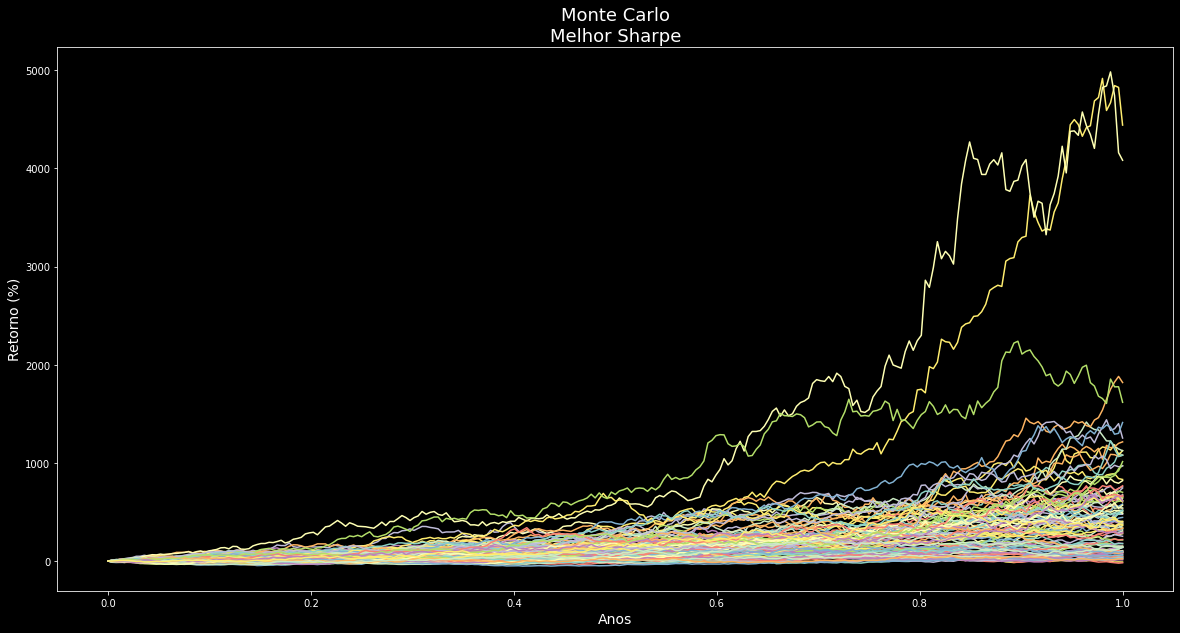

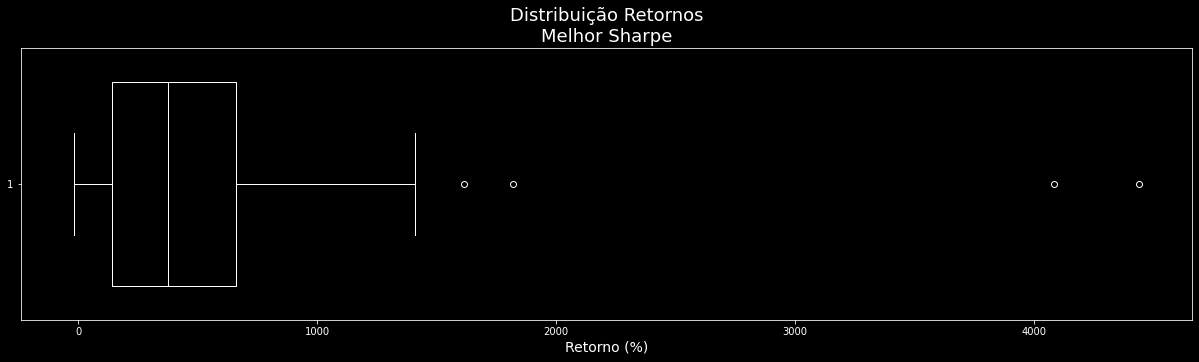

Agressivo
ITUB4.SA: 177333679%
RENT3.SA: -329713056%
B3SA3.SA: -166853699%
ABEV3.SA: 187827541%
JBSS3.SA: 255589476%
SUZB3.SA: 256058601%
NTCO3.SA: 362061300%
LREN3.SA: 118848607%
GGBR4.SA: -91273817%
HAPV3.SA: -366753566%
RAIL3.SA: -330802410%
EGIE3.SA: 172412407%
BRKM5.SA: 41627536%
MRFG3.SA: 39407944%
BRML3.SA: -325770445%
DescribeResult(nobs=100, minmax=(-100.0, -100.0), mean=-100.0, variance=0.0, skewness=0.0, kurtosis=-3.0)
Probabilidade de ter lucro: 0.00%
Probabilidade de atingir 15%: 0.00%


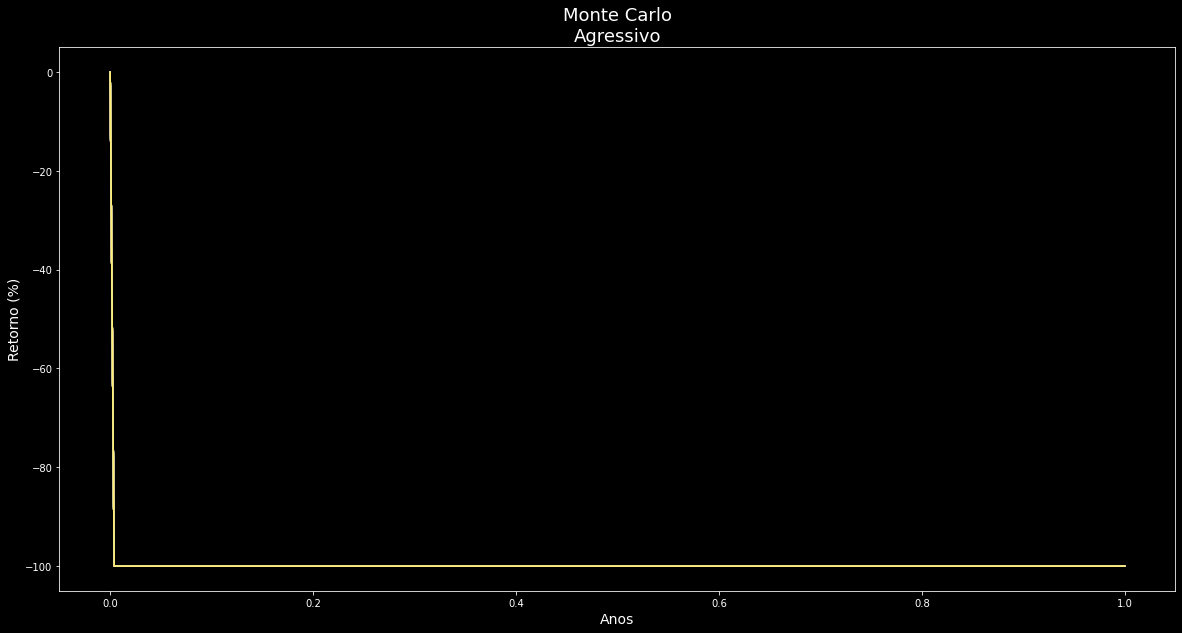

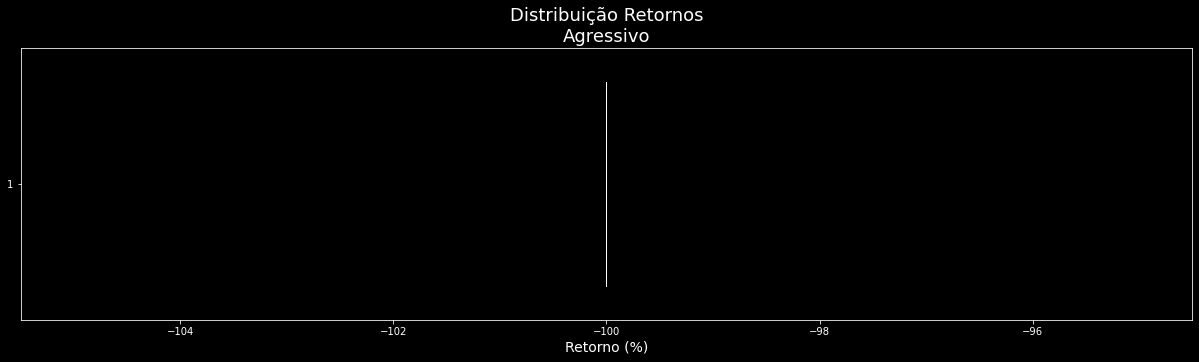

Conservador
ITUB4.SA: 11%
RENT3.SA: -13%
B3SA3.SA: -5%
ABEV3.SA: 2%
JBSS3.SA: 10%
SUZB3.SA: 11%
NTCO3.SA: -3%
LREN3.SA: 5%
GGBR4.SA: 13%
HAPV3.SA: 2%
RAIL3.SA: 15%
EGIE3.SA: 40%
BRKM5.SA: 0%
MRFG3.SA: 2%
BRML3.SA: 10%
DescribeResult(nobs=100, minmax=(-22.11677704423115, 73.06648174447574), mean=14.152188218248764, variance=368.6203161538586, skewness=0.5991259419855729, kurtosis=0.282609947390271)
Probabilidade de ter lucro: 76.00%
Probabilidade de atingir 15%: 41.00%


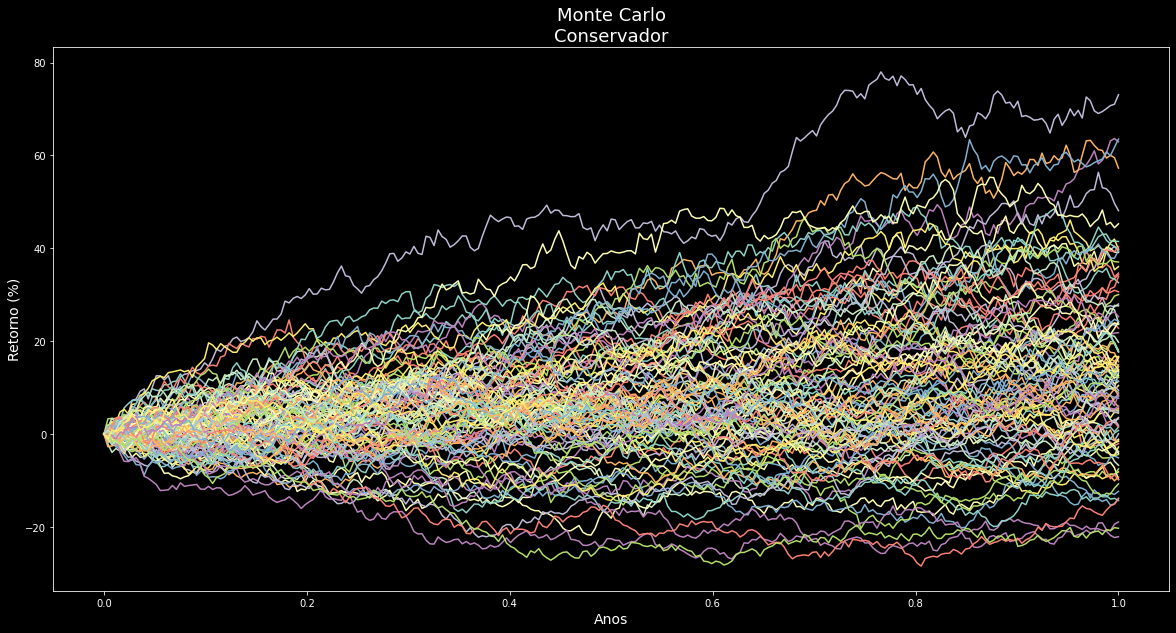

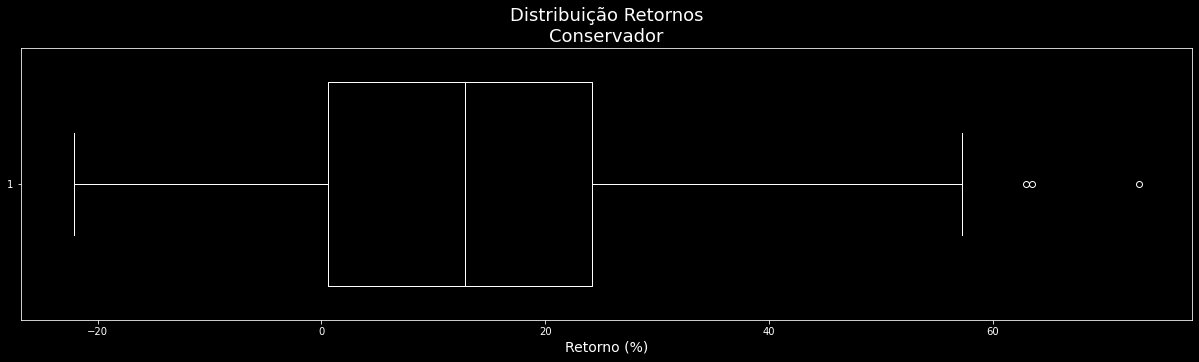

In [8]:
for i in params:
    # drift coefficent
    mu = i[2]
    # number of steps
    n = 252
    # time in years
    T = 1
    # number of sims
    M = 100
    # initial stock price
    S0 = 1
    # volatility
    sigma = i[3]
    
    # calc each time step
    dt = T/n

    # simulation using numpy arrays
    St = np.exp(
        (mu - sigma ** 2 / 2) * dt
        + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )

    # include array of 1's
    St = np.vstack([np.ones(M), St])

    # multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
    St = S0 * St.cumprod(axis=0)
    St = (St-1)*100
    
    # Define time interval correctly 
    time = np.linspace(0,T,n+1)

    # Require numpy array that is the same shape as St
    tt = np.full(shape=(M,n+1), fill_value=time).T
    
    print(i[0])
    for p, w in zip(tickers, i[1]):
        print(f'{p}: {w:.0%}')
    print(stats.describe(St[-1]))
    print(f'Probabilidade de ter lucro: {np.array(St[-1] > 0).sum()/M:.2%}')
    print(f'Probabilidade de atingir {meta}%: {np.array(St[-1] > meta).sum()/M:.2%}')
    
    
    plt.figure(figsize=(20,10))
    plt.plot(tt, St)
    plt.xlabel("Anos", fontsize=14)
    plt.ylabel("Retorno (%)", fontsize=14)
    plt.title(f"Monte Carlo\n{i[0]}", fontsize=18)
    plt.show()
    
    plt.figure(figsize=(21,5))
    plt.boxplot(St[-1], vert=False, widths=0.75, boxprops={'color': 'white'}, whiskerprops={'color': 'white'}, flierprops={'markeredgecolor': 'white'}, medianprops={'color': 'white'}, capprops={'color': 'white'})

    plt.xlabel("Retorno (%)", fontsize=14)
    plt.title(f"Distribuição Retornos\n{i[0]}", fontsize=18)
    plt.show()

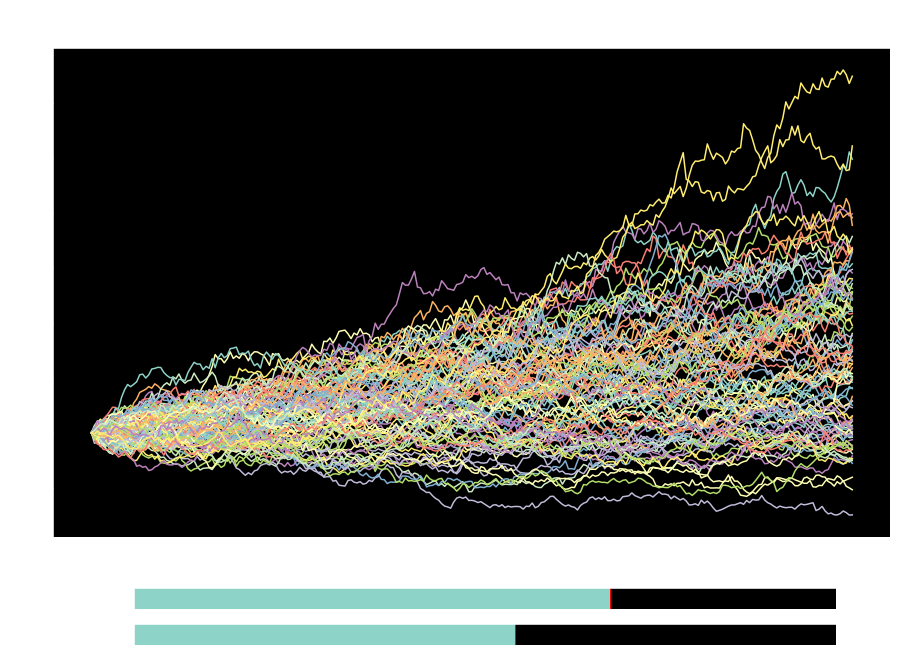

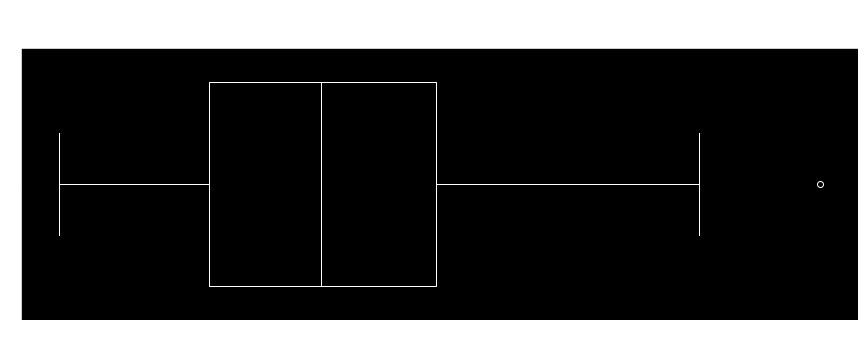

In [9]:
i = params[1]

# drift coefficent
mu = i[2]
# number of steps
n = 252
# time in years
T = 1
# number of sims
M = 100
# initial stock price
S0 = 1
# volatility
sigma = i[3]

# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0). 
St = S0 * St.cumprod(axis=0)
St = (St-1)*100

# Define time interval correctly 
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

fig, ax = plt.subplots(figsize=(15,10))
lines = plt.plot(tt, St)
plt.subplots_adjust(bottom=0.2)
plt.xlabel("Anos", fontsize=14)
plt.ylabel("Retorno (%)", fontsize=14)
plt.title(f"Monte Carlo\n{i[0]}", fontsize=18)

axdrift = plt.axes([0.2, 0.1, 0.65, 0.03])
drift_slider = Slider(
    ax=axdrift,
    label='Drift (a.a.)',
    valmin= 0,
    valmax=params[2][3]*1.25,
    valinit=mu,
)

axvol = plt.axes([0.2, 0.05, 0.65, 0.03])
vol_slider = Slider(
    ax=axvol,
    label="Volatility (%)",
    valmin=0,
    valmax= params[2][2]*1.25,
    valinit=sigma
)
plt.figure(figsize=(15,5))
plt.boxplot(St[-1], vert=False, widths=0.75, boxprops={'color': 'white'}, whiskerprops={'color': 'white'}, flierprops={'markeredgecolor': 'white'}, medianprops={'color': 'white'}, capprops={'color': 'white'})
plt.xlabel("Retorno (%)", fontsize=14)
plt.title(f"Distribuição Retornos\n{i[0]}", fontsize=18)

def update(val):
    St = np.exp((drift_slider.val - vol_slider ** 2 / 2) * dt+ vol_slider * np.random.normal(0, np.sqrt(dt), size=(M,n)).T)
    St = np.vstack([np.ones(M), St])
    St = S0 * St.cumprod(axis=0)
    St = (St-1)*100
    lines.set_ydata(St)
    fig.canvas.draw_idle()
    
drift_slider.on_changed(update)
vol_slider.on_changed(update)

plt.show()